In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt 
import io

from sklearn.utils import resample
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [3]:
# Store the input data in a dataframe
df2 = pd.read_csv("creditcard.csv")

In [4]:
# Show the first few inputs
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Function to graph training history
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()


In [21]:
# shuffle the dataframe so that the inputs are in a random order
df = df2.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,145795.0,1.908305,-0.678202,-2.909992,-0.685315,0.383424,-1.818591,1.028628,-0.625010,0.677809,...,0.307413,0.678695,-0.338726,-0.325637,0.545907,1.089702,-0.188085,-0.082635,160.00,0
1,132850.0,1.841895,-0.484146,-0.549516,0.201916,-0.359993,-0.000198,-0.453998,0.128924,1.041343,...,-0.126818,-0.392743,0.359237,0.644577,-0.407595,-1.037299,0.040322,-0.021594,59.95,0
2,75113.0,-3.082742,2.010070,1.145819,1.452722,-0.213760,0.447139,-0.253373,1.032780,-0.620169,...,-0.293106,-0.743146,0.243718,-0.323505,0.271231,-0.447193,-1.735994,-0.939748,5.32,0
3,142020.0,-0.109893,0.928143,-1.395960,-0.381336,0.689290,-0.313779,0.902576,0.257798,-0.552947,...,0.389693,0.951531,-0.056273,-1.161283,-0.169784,-0.110544,-0.038455,0.025898,105.75,0
4,70220.0,1.105250,0.080650,0.624721,1.261308,-0.399009,-0.045807,-0.201909,0.223070,0.173748,...,-0.133587,-0.344002,0.080058,0.160473,0.345280,-0.492740,0.031208,0.011231,7.00,0


In [22]:
# Scale the time and amount columns, since the rest of the features are scaled
# After experimentation, scaling the time feature was the only one that significantly improved results, so code to scale amount is commented out
robust_scaler = RobustScaler()

#df['scaled_amount'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1,1))

#df.drop(['Time','Amount'], axis=1, inplace=True)
df.drop(['Time'], axis=1, inplace=True)

In [33]:
# Scaled time
#scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

# Insert into beginning of df
#df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.drop(['scaled_time'], axis=1, inplace=True)
#df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)

# Show the result
df.head()

,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.717854,1.908305,-0.678202,-2.909992,-0.685315,0.383424,-1.818591,1.028628,-0.625010,0.677809,...,0.307413,0.678695,-0.338726,-0.325637,0.545907,1.089702,-0.188085,-0.082635,160.00,0
1,0.565773,1.841895,-0.484146,-0.549516,0.201916,-0.359993,-0.000198,-0.453998,0.128924,1.041343,...,-0.126818,-0.392743,0.359237,0.644577,-0.407595,-1.037299,0.040322,-0.021594,59.95,0
2,-0.112537,-3.082742,2.010070,1.145819,1.452722,-0.213760,0.447139,-0.253373,1.032780,-0.620169,...,-0.293106,-0.743146,0.243718,-0.323505,0.271231,-0.447193,-1.735994,-0.939748,5.32,0
3,0.673504,-0.109893,0.928143,-1.395960,-0.381336,0.689290,-0.313779,0.902576,0.257798,-0.552947,...,0.389693,0.951531,-0.056273,-1.161283,-0.169784,-0.110544,-0.038455,0.025898,105.75,0
4,-0.170021,1.105250,0.080650,0.624721,1.261308,-0.399009,-0.045807,-0.201909,0.223070,0.173748,...,-0.133587,-0.344002,0.080058,0.160473,0.345280,-0.492740,0.031208,0.011231,7.00,0


In [24]:
# Split the data into training (80%) and testing (20%)
train, test = train_test_split(df, test_size=0.2)

In [25]:
# Upsample fraud data
# Ended up not using this code as the network did better without it
'''df_genuine = train[train.Class==0]
df_fraud = train[train.Class==1]

df_fraud_upsampled = resample(df_fraud, 
                                 replace=True,     
                                 n_samples=40000,    
                                 random_state=123) 

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_genuine, df_fraud_upsampled])
 
# Display new class counts
df_upsampled.Class.value_counts()'''

'df_genuine = train[train.Class==0]\ndf_fraud = train[train.Class==1]\n\ndf_fraud_upsampled = resample(df_fraud, \n                                 replace=True,     \n                                 n_samples=40000,    \n                                 random_state=123) \n\n# Combine majority class with upsampled minority class\ndf_upsampled = pd.concat([df_genuine, df_fraud_upsampled])\n \n# Display new class counts\ndf_upsampled.Class.value_counts()'

In [26]:
# Split data into features and labels
train_features = np.array(train.values[:,0:30])
train_labels = np.array(train.values[:,-1])
test_features = np.array(test.values[:,0:30])
test_labels = np.array(test.values[:,-1])

In [27]:
print(train_features.shape)
print(test_features.shape)

(227845, 30)
(56962, 30)


In [28]:
# Neural network model - experimented and tested number of hidden layers, nodes per layer, dropout values, batch size, and epochs
# Tested umber of hidden layers: 2 and 3 layers
# Tested nodes per layer: 50, 100 and 200 nodes per layer
# Tested dropout values: 0.2 and 0.5
# Tested epochs: 25, 50 and 100
# Tested batch sizes: 128, 256 and 512
model = Sequential()
model.add(Dense(units=100, 
                input_dim=30, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,
                kernel_initializer='uniform',
                activation='sigmoid'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               3100      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 13,301
Trainable params: 13,301
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# Train the model
train_history = model.fit(x=train_features, y=train_labels,
                          validation_split=0.2, epochs=25, 
                          batch_size=512, verbose=1)

Train on 182276 samples, validate on 45569 samples
Epoch 1/25
182276/182276 [==============================] - 4s 20us/step - loss: 0.0402 - acc: 0.9981 - val_loss: 0.0082 - val_acc: 0.9987
Epoch 2/25
182276/182276 [==============================] - 3s 17us/step - loss: 0.0088 - acc: 0.9982 - val_loss: 0.0042 - val_acc: 0.9987
Epoch 3/25
182276/182276 [==============================] - 4s 20us/step - loss: 0.0064 - acc: 0.9984 - val_loss: 0.0032 - val_acc: 0.9995
Epoch 4/25
182276/182276 [==============================] - 3s 17us/step - loss: 0.0054 - acc: 0.9992 - val_loss: 0.0029 - val_acc: 0.9995
Epoch 5/25
182276/182276 [==============================] - 3s 18us/step - loss: 0.0051 - acc: 0.9992 - val_loss: 0.0031 - val_acc: 0.9994
Epoch 6/25
182276/182276 [==============================] - 3s 17us/step - loss: 0.0049 - acc: 0.9992 - val_loss: 0.0032 - val_acc: 0.9994
Epoch 7/25
182276/182276 [==============================] - 3s 18us/step - loss: 0.0049 - acc: 0.9993 - val_loss: 0

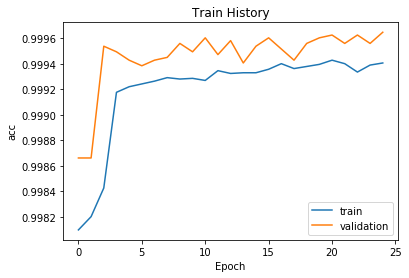

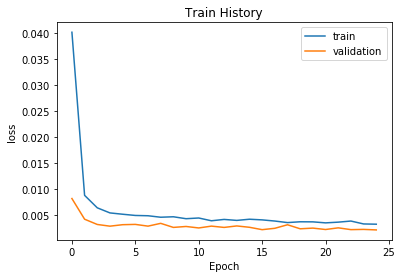

In [30]:
# Show graphs of training history for accuracy and loss
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [31]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [32]:
#Save the training data to demo later
np.save("TestingData", test_features)
np.save("TestingLabels", test_labels)